In [15]:
N = 100
totient = [0] * (N+1)
sigma = [0] * (N+1)

with open("data.csv") as h:
    for line in h.read().split("\n"):
        a, b, c = map(int, line.split(" "))
        totient[a] = b
        sigma[a] = c
        if a == N: break



In [16]:
import math
c = 6 / math.pi**2

import numpy as np
import matplotlib.pyplot as plt

In [17]:
from collections import Counter

pfactorize = [Counter() for _ in range(N + 1)]

def init_pfactorize():
    for i in range(2, N + 1):
        if pfactorize[i]:
            continue
        
        pow_i = i
        while pow_i <= N:
            for j in range(pow_i, N + 1, pow_i):
                pfactorize[j][i] += 1
            if pow_i > N // i:
                break
            pow_i *= i

init_pfactorize()

def ok2(n, p):
    return len(list(pfactorize[n])) == 2 and pfactorize[n][p]==1
    
prod = np.array([totient[i]*sigma[i] for i in range(N+1)])

plt.figure(figsize=(10, 8), dpi=100)

#plt.plot(x2, y2, '.', label='2p^α')
#plt.plot(x3, y3, '.', label='3p^α')
#plt.plot(x5, y5, '.', label='5p^α')

#THE POINTS AP^alpha WHERE A IS CONSTANT PRODUCES THE CURVE PHI(A)SIGMA(A)/A^2 X^2


xtest = np.arange(1, N, 1)

#plt.plot(xtest, prod[2]/2**2 *xtest**2, label='2#')
#plt.plot(xtest, prod[6]/6**2 *xtest**2, label='3#')
#plt.plot(xtest, prod[30]/30**2 *xtest**2, label='5#')
#plt.plot(xtest, prod[210]/210**2 *xtest**2, label='7#')
#plt.plot(xtest, prod[2310]/2310**2 *xtest**2, label='11#')

#THE BOUND IS ARBITRARILY GOOD. THE LINE AT A=P# WHEN P APPROACHES INFINITY.

plt.plot(xtest, c*xtest**2, label='lb')


plt.plot(prod, ',', label='all')

plt.legend()
plt.show()


TypeError: unsupported operand type(s) for /: 'list' and 'int'

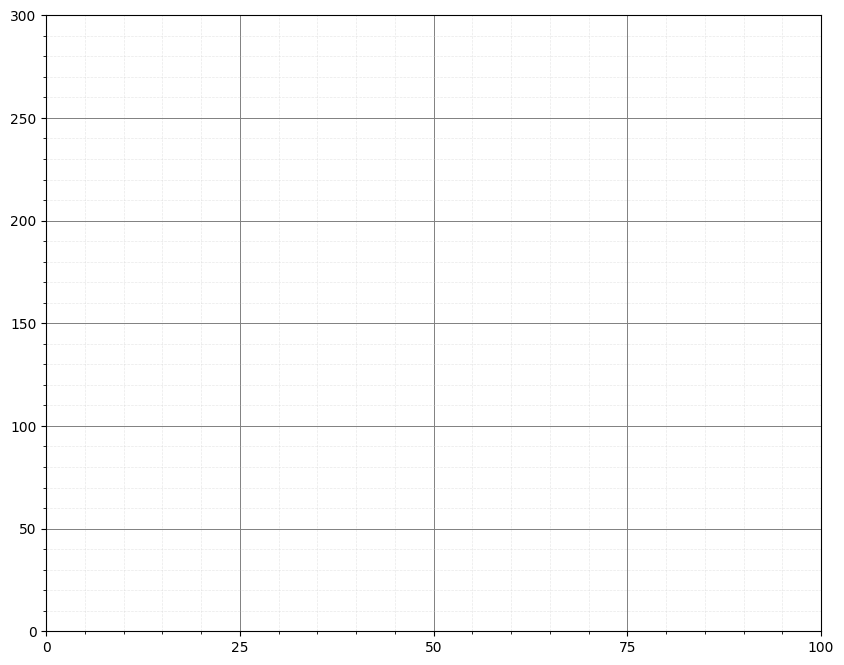

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)
x = np.arange(1, N+1)  # Correct range: 1 to 100 inclusive

# Customize ticks (only every 25 on x, every 50 on y)
plt.xticks(np.arange(0, N+1, 25))  # x-ticks every 25
plt.yticks(np.arange(0, max(sigma[1:N+1]) + 50, 50))  # y-ticks every 50

# Major gridlines (every 25 in x, every 50 in y) - DEFAULT
plt.grid(True, which='major', color='gray', linestyle='-', linewidth=0.7)

# Minor gridlines (every 5 in x, every 10 in y) - LIGHTER
plt.grid(True, which='minor', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.minorticks_on()  # Enable minor ticks

# Plot totient[x] vs x with red circles
plt.plot(x, totient[1:N+1], 'x-', label='φ(n)')
# Plot sigma(x) vs x (blue squares)
plt.plot(x, sigma[1:N+1], '+-', label='σ(n)')

plt.plot(x, x, '--', label='σ(n)', color='gray')

# Customize the plot
plt.title('The graphs of φ(n) and σ(n) vs n')
plt.legend()
plt.grid(True)
plt.show()

